In [1]:
import torch
import torchvision.transforms as transforms
from torch import nn
from PIL import Image

# Device configuration
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IS4242 Group 1

Mounted at /content/drive
/content/drive/MyDrive/IS4242 Group 1


In [3]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=10):
    super(AlexNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
        nn.BatchNorm2d(96),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2))
    self.layer3 = nn.Sequential(
        nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(384),
        nn.ReLU())
    self.layer4 = nn.Sequential(
        nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(384),
        nn.ReLU())
    self.layer5 = nn.Sequential(
        nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2))
    self.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(6400, 4096),
        nn.ReLU())
    self.fc1 = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU())
    self.fc2= nn.Sequential(
        nn.Linear(4096, num_classes))
      
  def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = self.layer3(out)
      out = self.layer4(out)
      out = self.layer5(out)
      out = out.reshape(out.size(0), -1)
      out = self.fc(out)
      out = self.fc1(out)
      out = self.fc2(out)
      return out

In [4]:
PATH = "./codes/weights/AlexNetModelFinal.pth"
model = AlexNet(10).to(DEVICE)
model_weight = torch.load(PATH, map_location=torch.device(DEVICE))
model.load_state_dict(model_weight)

<All keys matched successfully>

In [5]:
@torch.no_grad()
def prediction(img_path, model, classes, device):
  image_transforms = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
  ])
  image = Image.open(img_path)
  display(image.resize((int(image.size[0]/8),int(image.size[1]/8)), 0))
  image_tensor = image_transforms(image).unsqueeze(0)
  image_tensor = image_tensor.to(device, torch.float)
  output = model(image_tensor)
  index = output.cpu().data.numpy().argmax()
  pred = classes[index]
  return pred

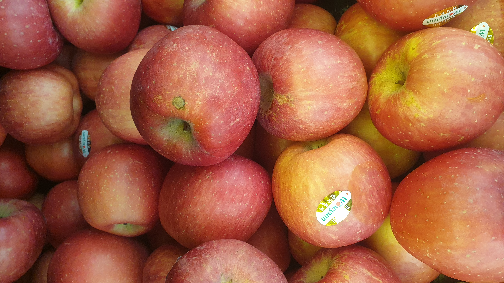

'Capsicum_Green'

In [6]:
classes = ['Apple_Green', 'Apple_Red', 'Banana', 'Capsicum_Green', 'Capsicum_Red', 'Capsicum_Yellow', 'Lemon', 'Orange', 'Pear', 'Tomato']
prediction("./codes/data/apple_red_test.jpg", model, classes, DEVICE)

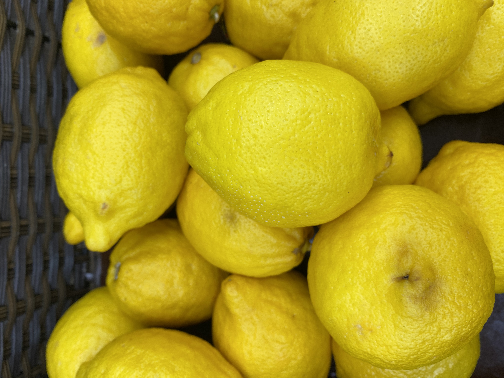

'Banana'

In [7]:
prediction("./codes/data/lemon_test.jpeg", model, classes, DEVICE)